## PCA(Principal Component Analysis)

PCA(Principal Component Analysis)
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화하도록 함
- 그러기 위해서는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원으로 축소하는데, 이것이 PCA의 주성분이 됨
- 즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

예: 키와 몸무게 2개의 피처를 가지고 있는 데이터 세트
- 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소
- 데이터 변동성이 큰 방향으로 축을 생성하고
- 새롭게 생성된 축으로 데이터를 투영하는 방식

PCA 수행 순서  
(1)  압력 데이터 세트의 공분산 행렬 생성  
(2) 공분산 행렬의 고유벡터와 고유값 계산  
(3) 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터 추출  
(4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환  

### PCA 예제1

PCA 예제1
- 붓꽃 데이터 세트 사용
- 4개의 속성(피처) : sepal length, sepal width, petal length, petal width
- PCA 사용 차원 축소 : 4개의 속성으리 2개의 PCA 차원으로 압축
- 원본 데이터 세트와 압축된 데이터 세트 차이점 확인

In [123]:
# 사이킷런 내장 데이터 셋 API 호출
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
column_names = list()
for name in iris.feature_names:
    column_names.append(name[:-5])
column_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [125]:
# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=column_names)
iris_df.head(2)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [126]:
iris_df['target'] = iris.target
iris_df.head(3)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화**

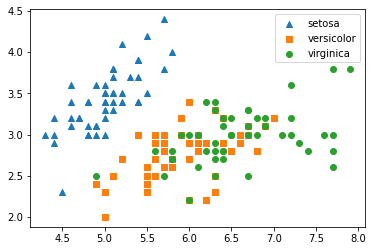

In [127]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    plt.scatter(x=iris_df[iris_df['target'] == i]['sepal length'], y=iris_df[iris_df['target'] == i]['sepal width'], marker=marker, label=iris.target_names[i])

plt.legend()
plt.show()

**평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환**

In [128]:
from sklearn.preprocessing import StandardScaler #정규분포로 변환

In [129]:
iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
iris_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [130]:
iris_scaled.shape

(150, 4)

**PCA 변환 수행**

스케일링이 적용된 데이터 세트에 PCA 적용
- 4차원(4개의 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환
- 사이킷런의 PCA 클래스 사용
- n_components 파라미터 : PCA로 변환할 차원의 수
- fit()/transform() 호출해서 PCA 변환 수행

In [131]:
from sklearn.decomposition import PCA #decomposition

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
iris_pca.shape

(150, 2)

In [132]:
# 넘파이 행렬을 DataFrame로 변환
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']

iris_pca_df = pd.DataFrame(data=iris_pca, columns=pca_columns)
iris_pca_df.head()

,pca_component_1,pca_component_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


**PCA로 차원 축소된 피처들로 데이터 산포도 시각화**

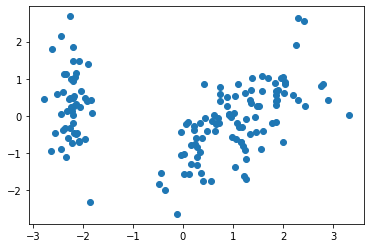

In [133]:
# pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 

plt.scatter(iris_pca_df['pca_component_1'], iris_pca_df['pca_component_2'])
plt.show()

In [134]:
iris_pca_df['target'] = iris_df['target']
iris_pca_df

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


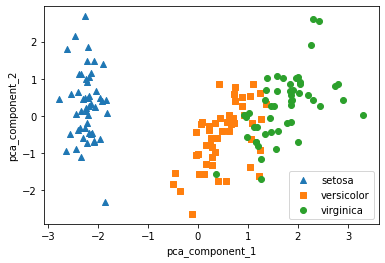

In [135]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    plt.scatter(x=iris_pca_df[iris_pca_df['target'] == i]['pca_component_1'], y=iris_pca_df[iris_pca_df['target'] == i]['pca_component_2'], marker=marker, label=iris.target_names[i])

plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.legend()
plt.show()

**각 PCA Component별 변동성 비율**

PCA Component별로 원본 데이터의 변동성 반영 정도 확인  
PCA 객체의 explained_variance_ratio_ 속성  
- 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [136]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

**원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**

In [137]:
# 원본 붓꽃 데이터에 랜덤 포레스트 알고리즘 적용한 결과
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=0)
scores = cross_val_score(rf_clf, iris_df.iloc[:,:-1], iris_df.iloc[:,-1], scoring='accuracy', cv=3)
print('원본 iris data 개별 정확도 :', np.round(scores, 2))

원본 iris data 개별 정확도 : [0.98 0.94 0.98]


In [138]:
# 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트 적용
pca_rf_clf = RandomForestClassifier(random_state=0)
pca_scores = cross_val_score(pca_rf_clf, iris_pca_df.iloc[:,:-1], iris_pca_df.iloc[:,-1], scoring='accuracy', cv=3)
print('원본 iris data 개별 정확도 :', np.round(pca_scores, 2))

원본 iris data 개별 정확도 : [0.88 0.88 0.9 ]


### PCA 예제2. 신용카드 데이터 세트 PCA 변환

- 사용 데이터 : 신용카드 고객 데이터 세트 (Credit Card Clients Data Set)

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
Data Folder: default of credit card clients.xls

pca_credit_card.xls로 변경

In [139]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [140]:
# 데이터 로드 및 컬럼명 변환
# 엑셀 파일 열고 첫 행과 ID 칼럼 확인

bills = pd.read_excel('../수업답안/PCA_credit_card.xls', header=1, index_col=0)
bills

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [141]:
bills.reset_index(drop=True, inplace=True)
bills.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**컬럼명 변경**
- PAY_0 다음에 PAY_2 있으므로 PAY_0을 PAY_1으로 변경
- default payment next month도 default로 변경
default 칼럼을 y_target 변수로 별도 저장
default 칼럼을 제외한 피처 데이터는 별도의 DataFrame으로 생성

In [142]:
# 칼럼명 변경
bills = bills.rename({'PAY_0':'PAY_1', 'default payment next month':'default'}, axis=1)

# default 칼럼을 y_target 변수로 별도 저장
y = bills['default']

# default 칼럼을 제외한 피처 데이터는 별도의 DataFrame으로 생성
X = credits.drop('default', axis=1)

In [143]:
# target 값 확인
y.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [144]:
# 23개의 속성
X.keys().shape

(23,)

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

**피처간 상관도 시각화**

corr() 이용해 각 속성 간의 상관도를 구한 뒤  
heatmap으로 시각화

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

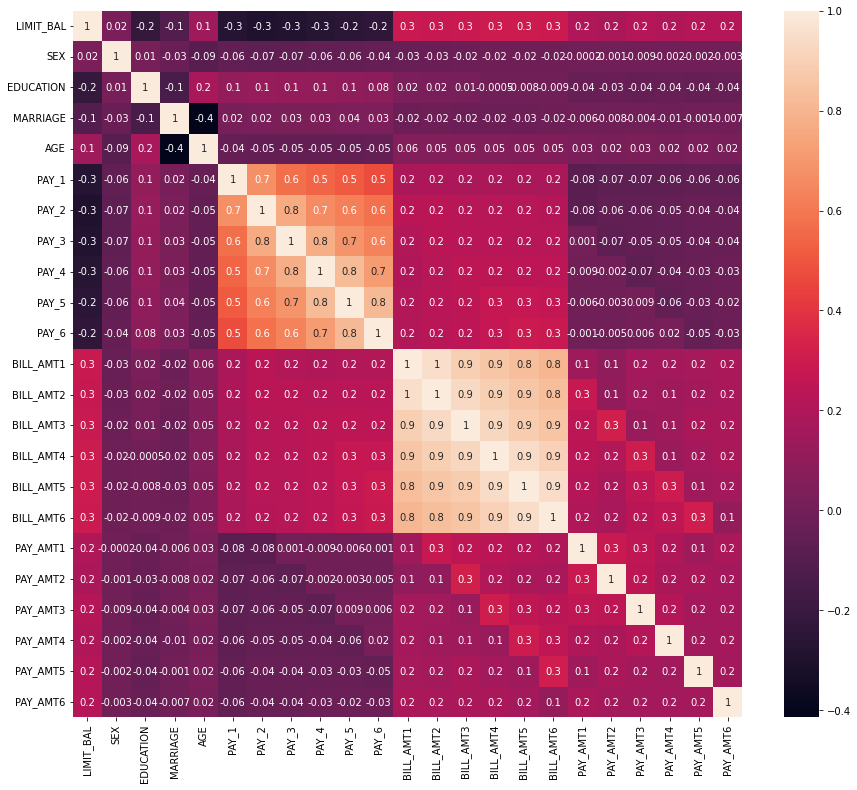

In [147]:
X_corr = X.corr()

plt.figure(figsize=(15,13))
sns.heatmap(X_corr, annot=True, fmt='.1g')
plt.show()

**상관도가 높은 피처들의 PCA 변환 후 변동성 확인**

In [148]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [149]:
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
cols_bill

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [150]:
scaler = StandardScaler()
col_scaled = scaler.fit_transform(X[cols_bill])
col_scaled.shape

(30000, 6)

In [151]:
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(col_scaled)

print('주성분 변동성 :',pca.explained_variance_ratio_)
print(pca_scaled.shape)

주성분 변동성 : [0.90555253 0.0509867 ]
(30000, 2)


**분류 예측 성능 비교**
- 원본 데이터 세트
- 컴포넌트로 PCA 변환한 데이터 세트

In [152]:
# 원본 데이터 세트의 분류 예측 성능 측정
# 랜덤 포레스트 이용
# 3개의 교차 검증 세트

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=0)
scores = cross_val_score(rf_clf, X, y, scoring='accuracy', cv=3, n_jobs=-1)

print('개별 정확도 :', scores)
print('평균 정확도 :',np.mean(scores))

개별 정확도 : [0.808  0.8206 0.8197]
평균 정확도 : 0.8161


In [164]:
from sklearn.preprocessing import StandardScaler

# 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 성능 측정

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6개의 Component를 가진 PCA 변환 수행
pca = PCA(n_components=12)
X_pca_scaled = pca.fit_transform(X_scaled)
print('pca 점수')
print(sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

# cross_val_score( )로 분류 예측 수행 
pca_rf_clf = RandomForestClassifier(random_state=0)
scores = cross_val_score(pca_rf_clf, X_pca_scaled, y, scoring='accuracy', cv=3, n_jobs=-1)

print('개별 정확도 :', scores)
print('평균 정확도 :',np.mean(scores))

pca 점수
0.8918292811588827
[0.28448215 0.17818817 0.06743307 0.06401154 0.04457556 0.04161737
 0.03946035 0.03859201 0.03788041 0.03404042 0.03186036 0.02968788]
개별 정확도 : [0.7994 0.8075 0.8101]
평균 정확도 : 0.8056666666666666
